# Tutorial

This tutorial will introduce you to some basic methods for processing data of youtube trending statisics. YouTube is an American's world leading video-sharing website. YouTube now operates as one of Google’s subsidiaries. Youtube trending data provides us a good view to know people's daily life, since in today's life people preferred to watch videos for entertainment, education and it covers nearly every aspect of our life. Thus, we can mining the youtube trending statistics to see the newly changes in the society and it is a perfect platform for advertisement. For example, we can easily find that the in the computer science education, in the recent two years the views of deeping learning vides has increased a lot, this will also influence people's career choice in the future. Also sometimes we want to find some high quality video which is not the mostly viewed but with a high likes/dislikes ratio, since mostly viewed video will cover up some newly posted but high quality videos.

### Tutorial content

In this tutorial, we will show how to do some basic trending analysis in Python, specifically using nltk and wordcloud.

We'll be using data collected from Youtube API which is provided by the kaggle test: https://www.kaggle.com/datasnaek/youtube-new/data. The dataset covers aroud 26,000 videos which collected from Nov,2017 to Mar,2018. 

We will cover the following topics in this tutorial:

* [Installing the libraries](#Installing-the-libraries)
* [Loading data and have a glance at the data](#Loading-data-and-have-a-glance-at-the-data)
* [Exploration 1: The secret of the most viewed videos](#Exploration-1:-The-secret-of-the-most-viewed-videos)
* [Exploration 2: Do you know the hottest topics in youtube of 2018?](#Exploration-2:-Do-you-know-the-hottest-topics-in-youtube-of-2018? )
* [Exploration 3: Could your video be the trending video after 15 days from the release date?](#Exploration-3:-Could-your-video-be-the-trending-video-after-15-days-from-the-release-date?)
* [Summary and references](#Summary-and-references)

## Installing the libraries

Before our trip, you'll need to install the various libraries that we will use. We can install all the necessary by using the **pip** command:

```python
pip install nltk
pip install textblob
pip install wordcloud
```

In [134]:
from ggplot import *
import pandas as pd 
import altair as alt
import numpy as np
import wordcloud
import matplotlib.pyplot as plt
import nltk
import string
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

## Loading data and have a glance at the data

Now that we've installed and loaded the libraries, let's load youtube statistics data. We're going to load data provided in the csv format, which stores data which each line contatins the information of one video.

Download the USvideos.csv.zip file from the kaggle website: https://www.kaggle.com/datasnaek/youtube-new/downloads/USvideos.csv/45. Then unzip the USvideos.csv.zip file to the local folder and you will find the USvideos.csv file. You can then load the data using the following command.

In [110]:
df = pd.read_csv("./USvideos.csv")
print(len(df))
df.head()

26151


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [111]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

We can see in this dataset, we have 26151 videos to anaylse, the columns and data types has been shown in the above.

## Exploration 1: The secret of the most viewed videos.

In the most popular videos in the youtube, you will always find that it is interesting, or at least it is attracting, it may be a well-made advertisement, but it do seize your eyes. So is it always true in various
categories of youtube videos. So let's start our exploration.

First we need to do is to get the sum of views, likes and dislikes which is grouped by the categories, then we define a new metric: likes/dislikes ratio, which represents whether people likes the video, the value is large which means that this video is with large possibility liked most people, and vice versa. Since this metric combines likes and dislikes, it can introduce the influence of dislikes compared with the metric like/views ratio. 
This means that some videos is popular most by annoying people, and ignite the anger of people.

In [112]:
df_popularity = df.groupby("category_id").agg({"views":"sum","likes":"sum","dislikes":"sum"}).reset_index()
df_popularity["like_ratio"] = df_popularity["likes"] / df_popularity["views"]
df_popularity["ratio(likes/dislikes)"] = df_popularity["likes"] / df_popularity["dislikes"]
#df_popularity["views"] = np.log(df_popularity["views"])
df_popularity["category_id"] = df_popularity["category_id"].astype(str)

Next we sort the categories by how many peoplo views the video, we pick up the top 10 categories, and then visualize the results

In [135]:
df_popularity = df_popularity.sort_values(by="views",ascending=0)
df_popularity = df_popularity[0:10]
print(len(df_popularity))
df_popularity

10


,category_id,views,likes,dislikes,like_ratio,ratio(likes/dislikes)
2,10,11418572637,505084933,16899235,0.044234,29.888035
9,24,8815885414,250243742,30224524,0.028386,8.279493
0,1,3053718929,69920111,2939479,0.022897,23.786566
8,23,2663990029,124069214,3958151,0.046573,31.345245
7,22,2341314477,78997803,3935243,0.033741,20.074441
4,17,2047570582,46421329,3163622,0.022671,14.673475
11,26,1709045448,68168648,2370077,0.039887,28.762208
13,28,1632666550,43623227,2226143,0.026719,19.595878
10,25,688556119,8596994,2345514,0.012486,3.665292
12,27,577916775,22919178,751601,0.039658,30.493810


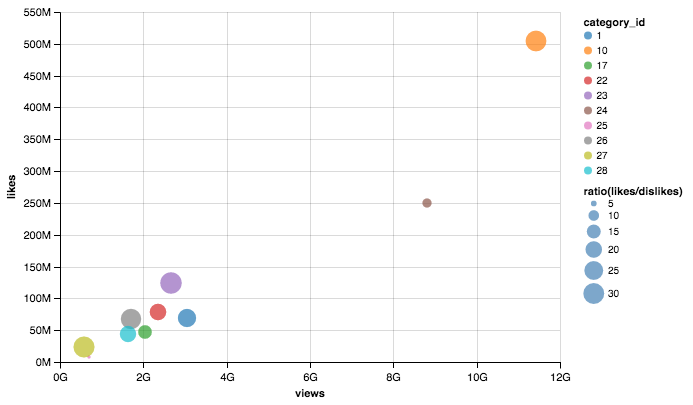

In [114]:
chart = alt.Chart(df_popularity)
chart.mark_circle().encode(
    x='views',
    y='likes',
    color='category_id',
    size='ratio(likes/dislikes)',
)

From the above graph, we can see that most of the top 10 categories is vidoes that most people thinks this videos is fit their tastes and like the videos. But there are two exceptions, the second most viewed category is some kind most people dislike the video but may attracted by the title or curious about the content of the video. People will voted dislikes after watching the videos. It seems some news are created in this way.

## Exploration 2: Do you know the hottest topics in youtube of 2018? 

If you be asked about the hottest topics in youtube of 2018. You may say it must be the Marvel Movies. Yes, you are right, and what else? AND what topics could be still hot in the future? Let's find out the answers.

Here we will explore the topics by two dimensions, the first is about the channels in the youtube, second is the tags of each videos. Tags could give more details about videos, where channel is a relatively broad concept.

First let's look at the channels, for different channel, how can we measure the what is hottest? Here hottest means that people think the video is meaningful and liked by most people. Thus we define two metrics: 

* popularity  = 0.7 * views + 0.3 * likes
* quality = 0.1 * views + 0.1 * likes + 0.1 * likes/dislikes 

where: 
* popularity: we reward likes and mostly decisive by how many people viewed the video.
* quality: we penalty the videos which although most people views, most people dislike. And this means the quality of the channel.

Why quality?

Quality is the future of the popularity.

If a channel is less popluar but of high quality, this means it has potential to lead the future. Thus we not just measure the populartiy as the only metric of the hottest.

In [115]:
df_channel = df.groupby(["channel_title","category_id"]).agg({"views":"sum","likes":"sum","dislikes":"sum"})

### normalize the metrics by using the max-min normalization

In [133]:
df_channel = df_channel.sort_values(by=["views","likes","dislikes"],
                                    ascending=[0,0,1]).reset_index()
df_channel = df_channel[df_channel["likes"] != 0]
df_top_channel = df_channel[0:100]
df_top_channel["likes_ratio"] = df_top_channel["likes"] / df_top_channel["dislikes"]
df_top_channel["views_normal"] = \
            (df_top_channel["views"] - df_top_channel["views"].min()) \
            /(df_top_channel["views"].max() -  df_top_channel["views"].min())
df_top_channel["likes_normal"] = \
            (df_top_channel["likes"] - df_top_channel["likes"].min()) \
            /(df_top_channel["likes"].max() -  df_top_channel["likes"].min())
df_top_channel["likes_ratio_normal"] = \
            (df_top_channel["likes_ratio"] - df_top_channel["likes_ratio"].min()) \
            /(df_top_channel["likes_ratio"].max() -  df_top_channel["likes_ratio"].min())

### calculate the quality and popularity of the channels

In [117]:
df_top_channel["quality"] = 0.3 * df_top_channel["views_normal"] + \
                               0.3 * df_top_channel["likes_normal"] + \
                               0.4 * df_top_channel["likes_ratio_normal"]

In [118]:
df_top_channel["popularity"] = 0.7 * df_top_channel["views_normal"] + \
                               0.3 * df_top_channel["likes_normal"]

### plot the results 

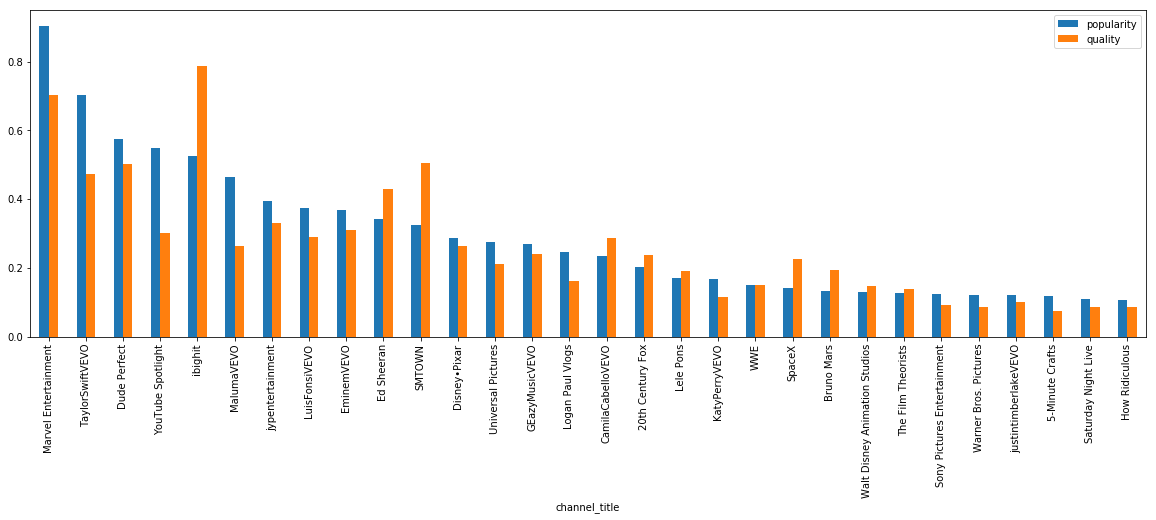

In [119]:
df_top_channel = df_top_channel[:30]
print(len(df_top_channel))
df_top_channel = df_top_channel.sort_values(by=["popularity","quality"],ascending=[0,0])
df_quality = df_top_channel[["channel_title","popularity","quality"]].plot(x="channel_title",kind="bar",figsize=(20,6))


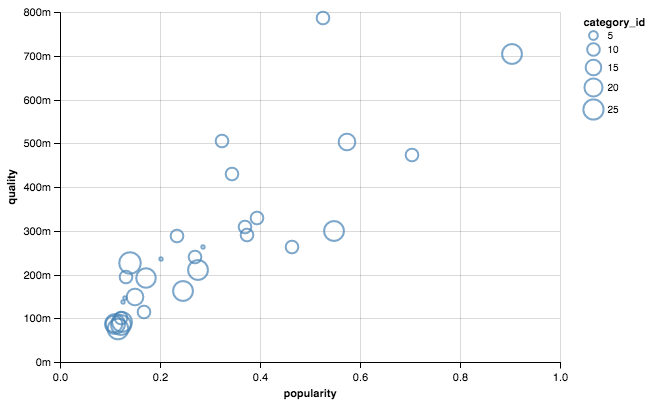

In [120]:
alt.Chart(df_top_channel).mark_point().encode(
    y='quality',
    x='popularity',
    size="category_id"
)

From the first graph, we can see that by observing the popularity, we can see what most people care about in general. And from the quality we can see which topics could most likely still be topics in the future. For example, the Ed Sheeran channel always produce high quality music, and it has the potential to be hot in the future.
From the second graph, the high popularity always with high quality.

Tags convey lots of the information about more detail of the topics which most viewed by people, so first we can tokenize the tags of each video, then use word cloud to visualize words which are most tagged by people.

In [121]:
# tokenize the word
def process(text, lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()):
    # apostrophe
    text = text.lower()
    text = text.replace("'s", "")
    text = text.replace("'","")
    exclude = set(string.punctuation)
    for punc in exclude:
        text = text.replace(punc , " ")

    tokens = nltk.word_tokenize(text)

    # lemmarized form
    sentence = []
    for word in tokens:
        try:
            word_stem = str(lemmatizer.lemmatize(word))
        except:
            pass 
        else:
            sentence.append(word_stem)
    return sentence



In [122]:
def process_all(df, lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()):
    
    df['tags'] = df['tags'].apply(lambda x: " ".join(process(x)))
    return df

In [123]:
df_tags = process_all(df)

In [124]:
df_tags.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,shantell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,last week tonight trump presidency last week t...,2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,racist superman rudy mancuso king bach racist ...,3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,rhett and link gmm good mythical morning rhett...,343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,ryan higa higatv nigahiga i dare you idy rhpc ...,2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [125]:
wordcloud_tags = wordcloud.WordCloud(
                          background_color='white',
                          stopwords= set(wordcloud.STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=42
                         ).generate(" ".join(df_tags["tags"]))

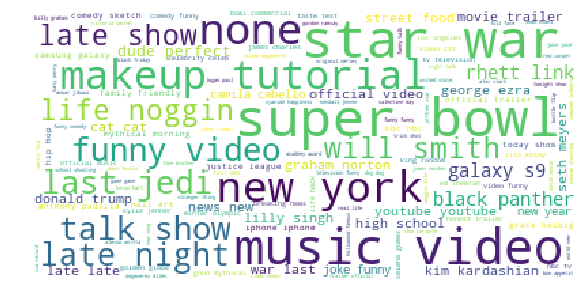

In [126]:
fig = plt.figure(2)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_tags)
plt.axis('off')
plt.show()

From the word cloud, we can lots topics which is highly discussed today, such as star war, music, video, galaxy s9. 

## Exploration 3: Could your video be the trending video after 15 days from the release date?


People upload the videos on youtube and want to share their findings to people as much as possible. If their video become the trending video, it would be the best reward. So if you release your videos on the youtube, half month passed, few people viewed, could it possible the trending video after 15 days? Let's start our trip.

This question is simple to solve, since we find that there exists two columns: *publich_time* and *trending_date*, so first we convert string type time to datetime type, then substract these two columns, get the difference of the time. Next is to plot the distributions of the difference time to see how many videos could become trending video after releasing 15 days.

In [127]:
df["publish_time"] = pd.to_datetime(df["publish_time"])
df["trending_date"] = df["trending_date"].apply(lambda x : "20" + x )
df["trending_date"] = pd.to_datetime(df["trending_date"],format='%Y.%d.%m')
df["date_diff"] = (df["trending_date"] - df["publish_time"]).apply(lambda x : x.days)

In [128]:
# trending dates 
df_trending = df.groupby("date_diff").agg({"views":"sum","likes":"sum","dislikes":"sum"}).reset_index()

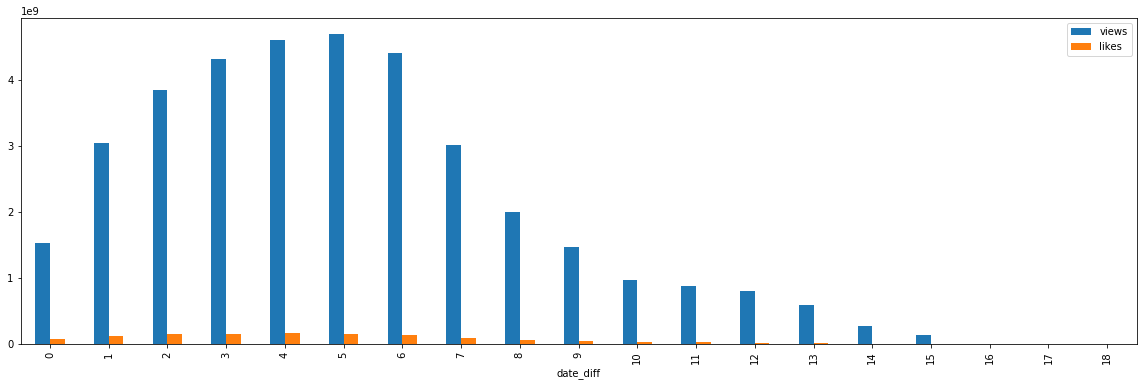

In [129]:
df_trending = df_trending[1:20]
print(len(df_trending))
df_quality = df_trending[["date_diff","views","likes"]].plot(x="date_diff",kind="bar",figsize=(20,6))

The answer is apparently not, most videos are becoming the trending video after released for before 15 days. This is reasonable, since trending videos are always about the new videos, when you release your new video, if it do attract people, it becomes the trending video in few days. If it is not, the content of the video is somehow not attractive and then become the tail video. Also we can observe that most video become the trending video within a week, this is also indicate that people always finds the recent interesting videos which is made within a week. 

## Summary and references

This tutorial highlighted just a few explorations of what is possible with data analyzed for youtube statistics data in Python. Much more detail about the libraries and questions on this dataset is general are available from the following links.

* [Mining YouTube using Python & performing social media analysis (on ALS ice bucket challenge)](https://www.analyticsvidhya.com/blog/2014/09/mining-youtube-python-social-media-analysis/)
* [Discovering the Special Characteristics of YouTube Users via Data](http://aeop.asecamps.com/wp-content/uploads/2017/07/TeamA.pdf)
* [word_cloud](https://github.com/amueller/word_cloud)
* [Trending YouTube Video Statistics](https://www.kaggle.com/datasnaek/youtube-new)